<a href="https://colab.research.google.com/github/angiecombs11-ops/PurdueHW/blob/main/3_22practice_supervised_learning_01_11_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

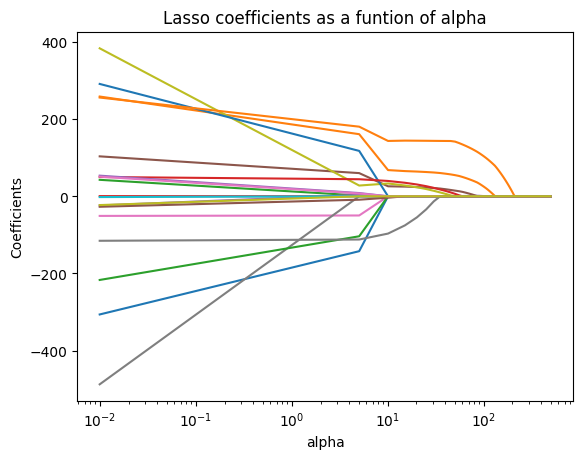

In [24]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Load the data from a CSV file into a DataFrame and display 5 rows
df = pd.read_csv('Hitters.csv')
df.head()

df.columns

# Remove "Unnamed: 0" from the dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)

df.info()

print("Number of missing values in 'Salary':", len(df[df['Salary'].isnull()]))


# creating dummies for all the variable of object type
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
# Convert boolean Ture/False to integer 1/0
dummies = dummies.astype(int)
dummies.info()

dummies.head()

# create label X and y
y= df['Salary']

# drip the column with the outcome variable (Salary), and categorical columns for which dummy variables is already created:
X_numerical = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')

#list of all numerical columns in X_numerical
list_numerical = X_numerical.columns
list_numerical

# Create X with dummy variables and numberical variables
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

#Split the dataset into training and testing sets before handling missing values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Perform Standardization on numerical features.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

X_train.head()

# Imputing the values NA values in the series with the median
median_salary = y_train.median(skipna=True)
y_train = y_train.fillna(median_salary)
y_test = y_test.fillna(median_salary)

# Create and fit the Lassy regression modelto the training data
lasso_model = Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)
print("Lasso intercept:", lasso_model.intercept_)

# Get the coefficients (weights_ of the fittied Lasso regression model
print("Lasso coefficients:", lasso_model.coef_)

# Training data
pred_train = lasso_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))
print('R squared training set', round(r2_score(y_train, pred_train)*100,2))
print("---------------------------------")

# Test data
pred_test = lasso_model.predict(X_test)
mse_test = mean_squared_error(y_test, pred_test)
print('MSE test set', round(mse_test, 2))
print('R squared test set', round(r2_score(y_test, pred_test)*100,2))

alphas = np.linspace(0.01, 500, 100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
  lasso.set_params(alpha=a)
  lasso.fit(X_train, y_train)
  coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a funtion of alpha');

